In [79]:
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
import numpy as np

目标函数:   $f(x) = 3x^3 + 2x^2 + 0.9x + 10 $

In [116]:
def target_fn(x):
    return 0.9*x+10

函数可视化

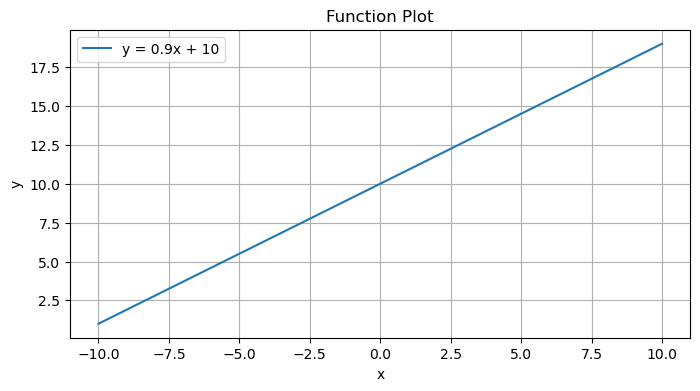

In [118]:
# 定义x的范围和间隔
x = np.linspace(-10, 10, 400)  # 从-10到10，取400个点
y = target_fn(x)

plt.figure(figsize=(8,4))  # 设置图像大小
plt.plot(x, y, label="y = 0.9x + 10")
plt.title("Function Plot")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

In [98]:
# 测试nn.Linear函数
torch.manual_seed(42)

fn = nn.Linear(1,1)
print(f"weight is {fn.weight}")
print(f"bias is {fn.bias}")

fn(torch.tensor([1]).float())

weight is Parameter containing:
tensor([[0.7645]], requires_grad=True)
bias is Parameter containing:
tensor([0.8300], requires_grad=True)


tensor([1.5945], grad_fn=<AddBackward0>)

In [173]:
# 拟合线性函数
torch.manual_seed(42)

fn = nn.Linear(1,1)
optimizer = optim.Adam(fn.parameters(), lr=0.0015)
criterion = nn.MSELoss()  # 实例化损失函数

best_value = 5000
count =0 
for i in range(6000):
    y_predict = fn(torch.tensor(x).float().unsqueeze(1))
    loss = criterion(y_predict,torch.tensor(y).float().unsqueeze(1))
    loss.backward()
    optimizer.step()
    
    if loss.item() < best_value:
        best_value = loss.item()
        count = 0
    else:
        count +=1
    
    if i % 500 == 0:
        print(f"MSE Loss is {loss}")
    # 早停，如果30个值连续值没有提升则停止
    if count >=400:
        print("early stop")
        break
    

print(f"weight is {fn.weight}")
print(f"bias is {fn.bias}")


MSE Loss is 84.70347595214844
MSE Loss is 65.04924774169922
MSE Loss is 47.256343841552734
MSE Loss is 33.63081359863281
MSE Loss is 25.161375045776367
MSE Loss is 14.712150573730469
MSE Loss is 11.777874946594238
MSE Loss is 6.469175338745117
MSE Loss is 1.9185901880264282
MSE Loss is 0.13757562637329102
early stop
weight is Parameter containing:
tensor([[0.7120]], requires_grad=True)
bias is Parameter containing:
tensor([10.3809], requires_grad=True)


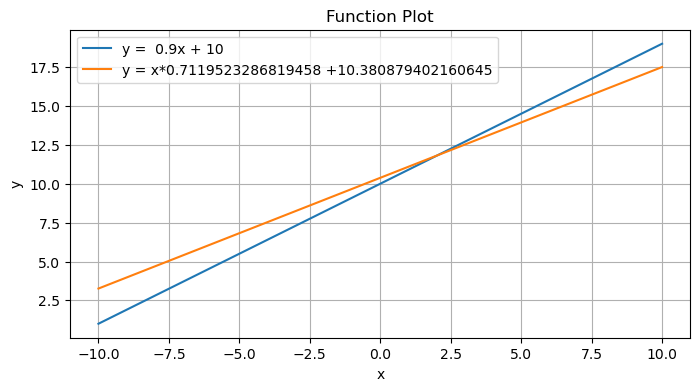

In [174]:
x = np.linspace(-10, 10, 400)  # 从-10到10，取400个点
y = target_fn(x)
y_predict = x*fn.weight.item() + fn.bias.item()

plt.figure(figsize=(8,4))  # 设置图像大小
plt.plot(x, y, label="y =  0.9x + 10")
plt.plot(x, y_predict, label=f"y = x*{fn.weight.item()} +{fn.bias.item()}")

plt.title("Function Plot")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

In [93]:
y_predict

array([-3.68544979e+01, -3.66700958e+01, -3.64856938e+01, -3.63012918e+01,
       -3.61168898e+01, -3.59324878e+01, -3.57480858e+01, -3.55636838e+01,
       -3.53792818e+01, -3.51948798e+01, -3.50104777e+01, -3.48260757e+01,
       -3.46416737e+01, -3.44572717e+01, -3.42728697e+01, -3.40884677e+01,
       -3.39040657e+01, -3.37196637e+01, -3.35352616e+01, -3.33508596e+01,
       -3.31664576e+01, -3.29820556e+01, -3.27976536e+01, -3.26132516e+01,
       -3.24288496e+01, -3.22444476e+01, -3.20600456e+01, -3.18756435e+01,
       -3.16912415e+01, -3.15068395e+01, -3.13224375e+01, -3.11380355e+01,
       -3.09536335e+01, -3.07692315e+01, -3.05848295e+01, -3.04004274e+01,
       -3.02160254e+01, -3.00316234e+01, -2.98472214e+01, -2.96628194e+01,
       -2.94784174e+01, -2.92940154e+01, -2.91096134e+01, -2.89252114e+01,
       -2.87408093e+01, -2.85564073e+01, -2.83720053e+01, -2.81876033e+01,
       -2.80032013e+01, -2.78187993e+01, -2.76343973e+01, -2.74499953e+01,
       -2.72655932e+01, -